In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [2]:
dataset = pd.read_csv('/Users/ytuo/Desktop/2023 FALL/ece-9063/House-Pricing/train.csv')
sample_submission = pd.read_csv('/Users/ytuo/Desktop/2023 FALL/ece-9063/House-Pricing/sample_submission .csv')

In [3]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

# Data Preprocessing

In [4]:
# Handle missing values and feature engineering for data_train and data_test

# Split the data_train dataset into features and target variable
feature_columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageArea']
label_column = ['SalePrice']

In [5]:
features = dataset[feature_columns]
label = dataset[label_column]

# Model Selection and Splitting Data

In [6]:
features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageArea
0,60,65.0,8450,7,5,2003,2003,548
1,20,80.0,9600,6,8,1976,1976,460
2,60,68.0,11250,7,5,2001,2002,608
3,70,60.0,9550,7,5,1915,1970,642
4,60,84.0,14260,8,5,2000,2000,836


In [7]:
label.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [8]:
X = features.values
Y = label.values

In [9]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 0) 

In [10]:
# Define the imputer
imputer = SimpleImputer(strategy='median')
# Create a pipeline that imputes missing values and fits the LinearRegression model
regressor = make_pipeline(imputer, RandomForestRegressor())

# Fit the model
regressor.fit(X_train, Y_train.ravel())

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestregressor', RandomForestRegressor())])

# Model Evaluation

In [11]:
X_test

array([[2.0000e+01,        nan, 3.2668e+04, ..., 1.9570e+03, 1.9750e+03,
        4.8400e+02],
       [5.0000e+01, 7.9000e+01, 9.4900e+03, ..., 1.9410e+03, 1.9500e+03,
        2.4000e+02],
       [5.0000e+01,        nan, 7.0150e+03, ..., 1.9500e+03, 1.9500e+03,
        3.5200e+02],
       ...,
       [5.0000e+01, 6.0000e+01, 8.5200e+03, ..., 1.9160e+03, 1.9500e+03,
        2.1600e+02],
       [3.0000e+01, 5.0000e+01, 5.3300e+03, ..., 1.9400e+03, 1.9500e+03,
        0.0000e+00],
       [7.5000e+01, 6.0000e+01, 7.2000e+03, ..., 1.9200e+03, 1.9960e+03,
        2.8800e+02]])

In [12]:
Y_pred = regressor.predict(X_test)

In [13]:
Y_pred

array([218789.2       , 123997.5       , 117586.94      , 180310.8       ,
        91563.        , 117054.62      , 338667.4       , 160107.        ,
       543103.52      , 194415.2       , 190220.99666667, 156417.5       ,
       200058.35      , 128250.        , 126689.37      , 126873.24      ,
       221498.2       , 113762.58      , 134198.        , 154458.95      ,
       115742.8       , 147323.84761905, 134506.5       , 155213.14      ,
       163992.5       , 277110.        , 172377.33333333,  84388.        ,
       329350.2       , 117430.58      , 145320.5       , 199256.25      ,
       149489.        , 306536.99      , 297488.06      , 229292.8       ,
       301591.38      , 131759.84      , 210742.44      , 323971.51      ,
       188380.        , 113469.54      , 187228.16      , 307231.17      ,
       274698.15      , 133449.33      , 132920.83      , 151232.5       ,
       158950.5       , 132711.6       , 373311.        , 148116.93      ,
       183189.        ,  

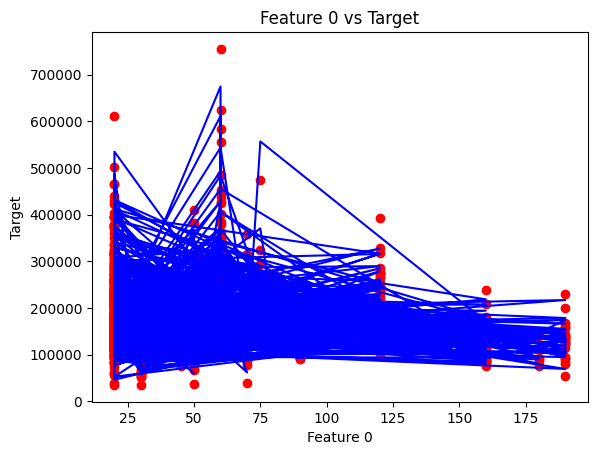

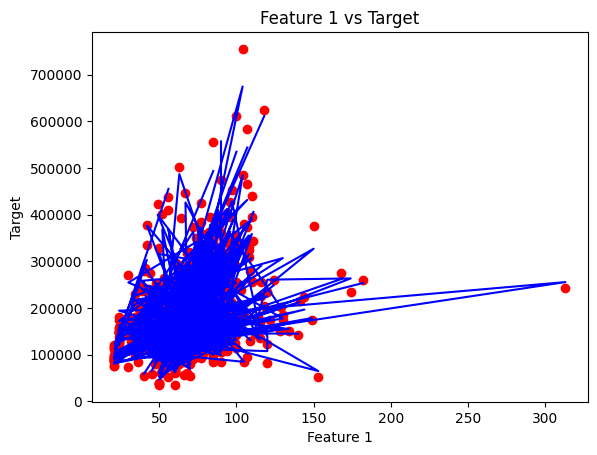

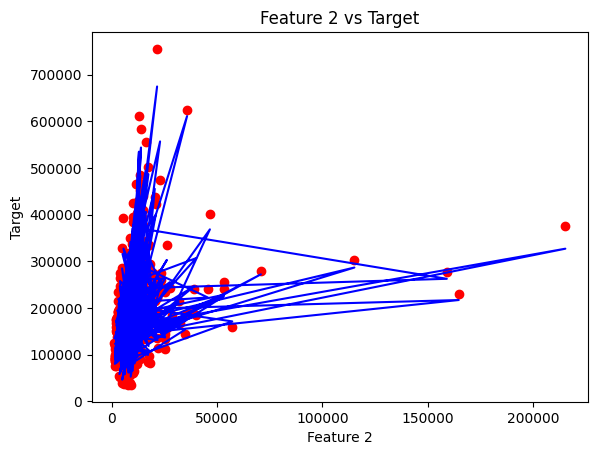

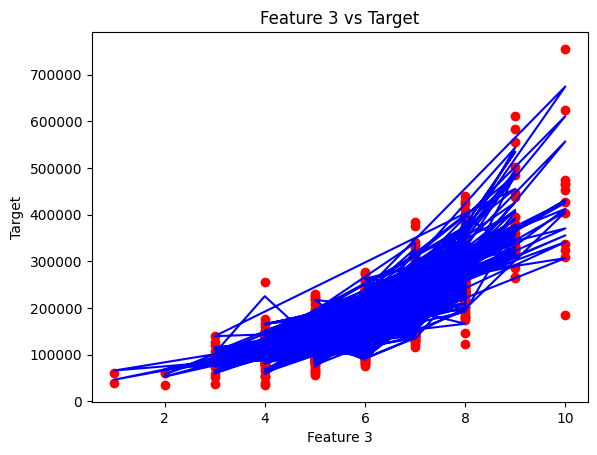

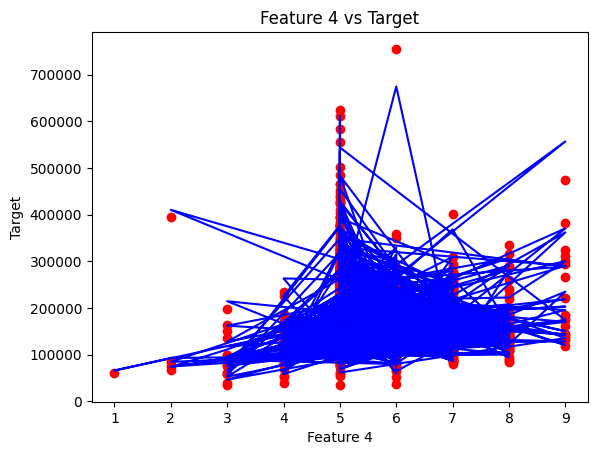

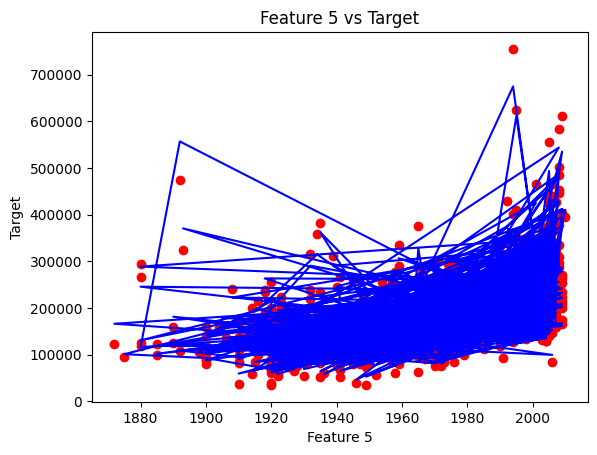

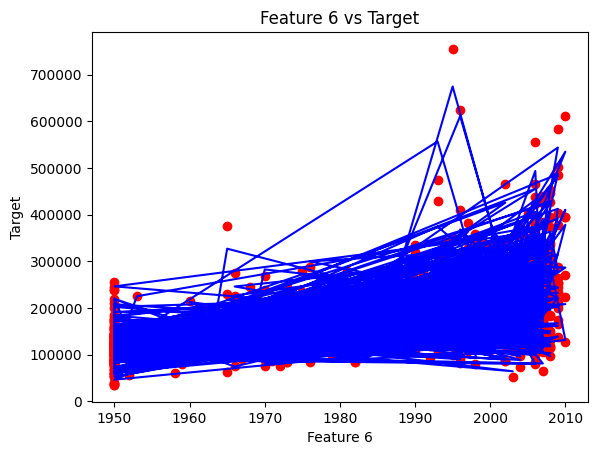

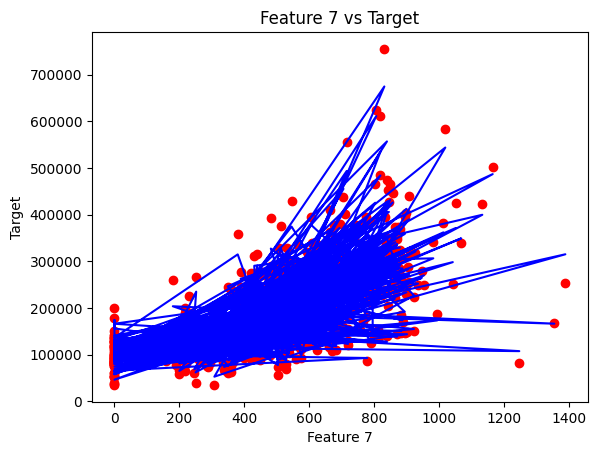

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming X_train is a numpy array and not a DataFrame
for i in range(X_train.shape[1]):
    plt.figure(i)
    plt.scatter(X_train[:, i], Y_train, color='red')
    plt.plot(X_train[:, i], regressor.predict(X_train), color='blue')
    plt.title(f'Feature {i} vs Target')
    plt.xlabel(f'Feature {i}')
    plt.ylabel('Target')
    plt.show()

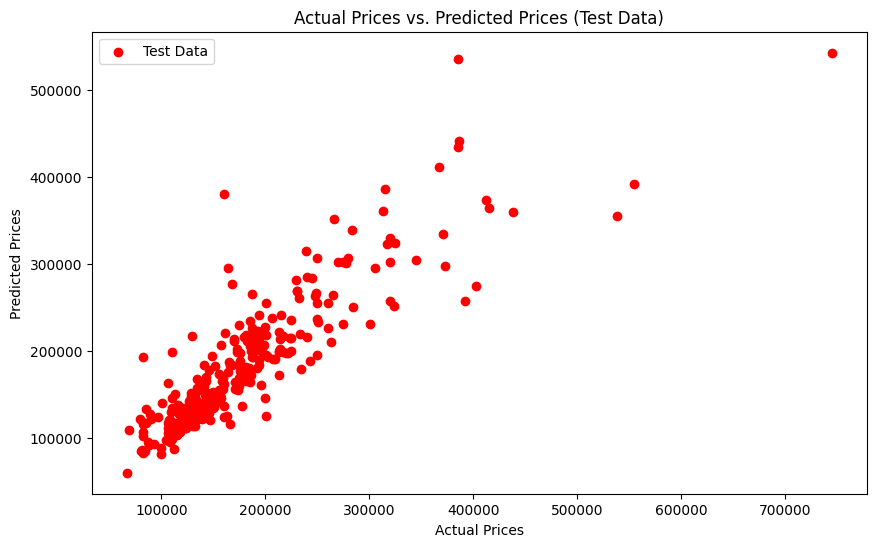

In [20]:
# Create a scatter plot to compare actual vs. predicted prices for the test data
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='red', label='Test Data')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices (Test Data)")
plt.legend()

plt.show()

# Model Evaluation

In [21]:
# converts Y from a 2D array to a 1D array. 
Y = label.values.ravel()

# Perform 5-fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

# Calculate Mean Absolute Error for cross-validation
mae_scores = -cross_val_score(regressor, X, Y, cv=kf, scoring='neg_mean_absolute_error')

# Calculate Mean Squared Error for cross-validation
mse_scores = -cross_val_score(regressor, X, Y, cv=kf, scoring='neg_mean_squared_error')

# Calculate Root Mean Squared Error from Mean Squared Error
rmse_scores = [np.sqrt(abs(score)) for score in mse_scores]

# Print the cross-validation scores
for fold, (mae, rmse) in enumerate(zip(mae_scores, rmse_scores)):
    print(f"Fold {fold+1} MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Calculate the mean MAE and RMSE values from cross-validation
mean_mae = np.mean(mae_scores)
mean_rmse = np.mean(rmse_scores)

# Print the mean cross-validation scores
print(f"Mean MAE: {mean_mae:.2f}")
print(f"Mean RMSE: {mean_rmse:.2f}")



Fold 1 MAE: 25307.80, RMSE: 39406.27
Fold 2 MAE: 22505.99, RMSE: 35149.78
Fold 3 MAE: 26105.84, RMSE: 37870.06
Fold 4 MAE: 22682.01, RMSE: 34043.49
Fold 5 MAE: 23779.30, RMSE: 35409.33
Mean MAE: 24076.19
Mean RMSE: 36375.79
